# Give Me Some Credit
**Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years**

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. The goal here is to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

**The goal of this project is to build a model that borrowers can use to help make the best financial decisions.**

## Loading the dataset

In [192]:
url = 'https://www.kaggle.com/competitions/GiveMeSomeCredit/data'

import opendatasets as od
od.download(url)

Skipping, found downloaded files in "./GiveMeSomeCredit" (use force=True to force download)


In [193]:
data_dir='./GiveMeSomeCredit'

import os
os.listdir(data_dir)

['sampleEntry.csv', 'Data Dictionary.xls', 'cs-test.csv', 'cs-training.csv']

## Data Preparation and Cleaning

In [194]:
import pandas as pd
dataset = pd.read_csv(data_dir+"/cs-training.csv",index_col=0)
testset = pd.read_csv(data_dir+"/cs-test.csv")
dataset.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### Looking into missing datapoints

We see that two of the columns **"MonthlyIncome"** and **"NumberOfDependents"** have missing values. Our usual approach 
would be to skip this column or impute it with mean. But upon closer observation, we see that all the columns with Monthlyincome as "0" or "NAN" have absurdly large DebtRatio. Thus using the DebtRatio will affect the model badly.

So I'll be removing the DebtRatio column and **replacing all the NaN columns in "MonthlyIncome" with 0.0** as it is the most apt value for the case. Also doing the same for NumberofDependents.

In [196]:
dataset[(dataset['MonthlyIncome'].isna()) | (dataset['MonthlyIncome']==0)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
15,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [197]:
dataset['MonthlyIncome'] = dataset['MonthlyIncome'].fillna(0)
dataset['NumberOfDependents'] = dataset['NumberOfDependents'].fillna(0)

testset['MonthlyIncome'] = testset['MonthlyIncome'].fillna(0)
testset['NumberOfDependents'] = testset['NumberOfDependents'].fillna(0)

# Removing the DebtRatio column
dataset.drop('DebtRatio',inplace=True, axis=1)
testset.drop('DebtRatio',inplace=True, axis=1)

## Exploratory Analysis and Visualization

In [198]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**1. Plotting the distribution of labels**

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

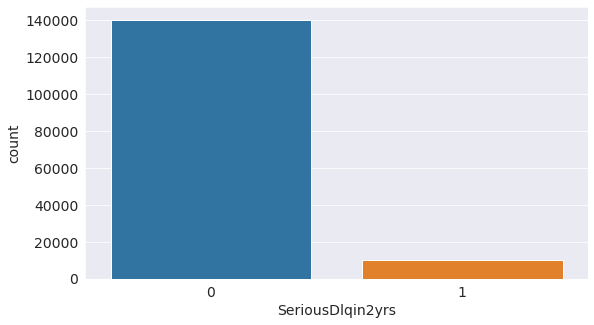

In [8]:
sns.countplot(x=dataset['SeriousDlqin2yrs'])

We see that the dataset is highly imbalanced. We will need to account for it while constructing the model.

**2. Plotting the relationship of debt with Age**

<AxesSubplot:xlabel='age', ylabel='Count'>

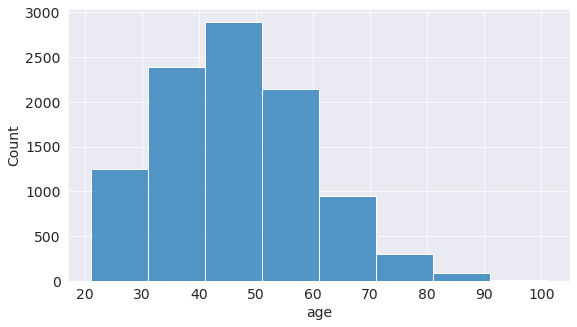

In [9]:
sns.histplot(dataset[dataset['SeriousDlqin2yrs']==1].age, bins=8)

We see that People likely to be in debt are individuals with age of around 30 to 60.

**3. Plotting the relationship with Late due payment**

<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='SeriousDlqin2yrs'>

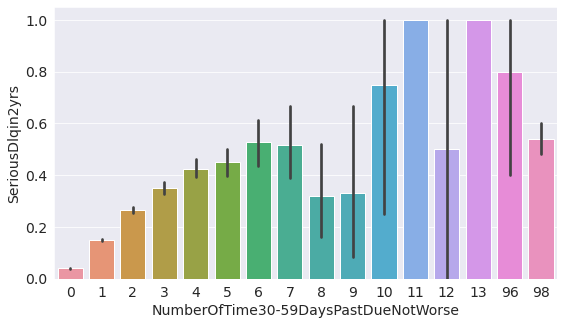

In [10]:
sns.barplot(x=dataset['NumberOfTime30-59DaysPastDueNotWorse'],y=dataset['SeriousDlqin2yrs'])

<AxesSubplot:xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='SeriousDlqin2yrs'>

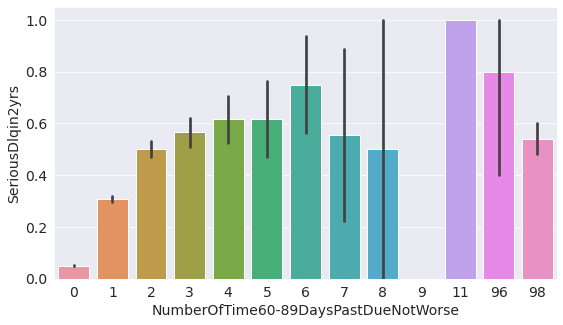

In [11]:
sns.barplot(x=dataset['NumberOfTime60-89DaysPastDueNotWorse'],y=dataset['SeriousDlqin2yrs'])

<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='SeriousDlqin2yrs'>

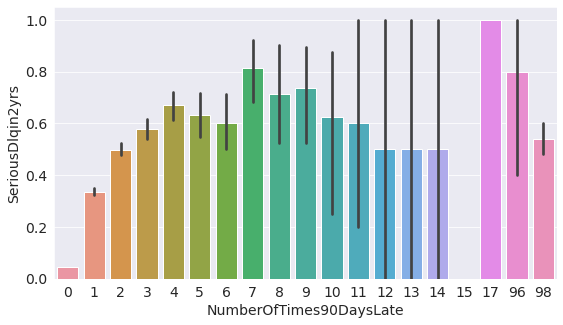

In [12]:
sns.barplot(x=dataset['NumberOfTimes90DaysLate'],y=dataset['SeriousDlqin2yrs'])

## Defining a model to train the data

In [208]:
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [209]:
X = pd.get_dummies(dataset.iloc[:,1:])
y = dataset.iloc[:,0]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [358]:
# Defining a Scoring function
def get_score(model):
    train_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    valid_score = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    
    print(f"Training Score : {train_score}")
    print(f"Validation Score : {valid_score}\n")

def plot_score(func, parameter, values):
    train_list, valid_list = [], []
    for i in values:
        params={parameter:i}
        train_score, valid_score = func(**params)
        train_list.append(train_score)
        valid_list.append(valid_score)
    
    plt.title("Validation Curve")
    plt.ylabel("Score")
    plt.xlabel(parameter)
    plt.plot(values, valid_list, 'b-o', label='Validation')
    
    plt.legend()
    plt.show()

## 1. Random Forest model

In [353]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

get_score(forest)

Training Score : 0.9998599745526031
Validation Score : 0.8268346534907606



The performance of the model is good, but it is overfitting. This can be prevented by tuning the hyperparameters. Some of the important hyperparameters for a forest model is :
- n_estimators - no of trees used
- max_depth - maximum depth of the tree
- n_jobs - number of jobs to run parallel
- max_features - number of features to consider for best split


### Hyperparameter Tuning for Random forest

In [354]:
def test_params_Forest(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    valid_score = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    return(train_score, valid_score)

**Tuning n_estimators**

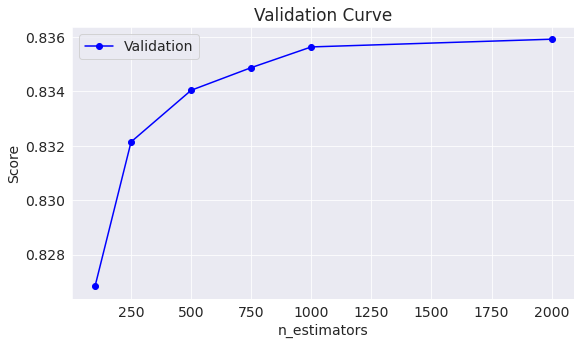

In [356]:
plot_score(test_params_Forest, 'n_estimators', [100,250,500,750,1000,2000])

We see that increasing n_estimators beyond **1000** is not helping the model much. It would be better to tune other parameters.

**Tuning max_depth**

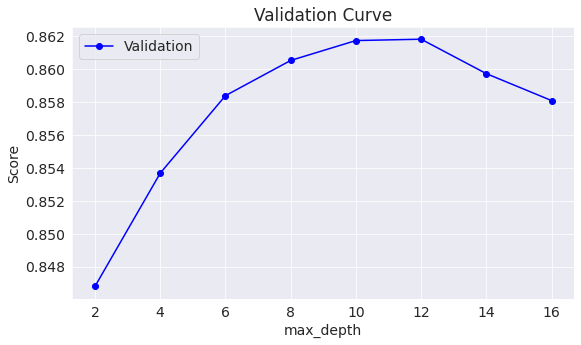

In [357]:
plot_score(test_params_Forest, 'max_depth', [2,4,6,8,10,12,14,16])

We see that the validation score peaks at a max_depth value of **10 to 12**.

**Tuning max_features**

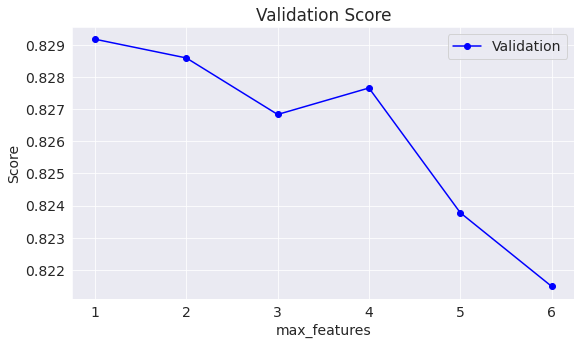

In [225]:
plot_score(test_params_Forest, 'max_features', [1,2,3,4,5,6])

We see that the validation score peaks at max_features = 1.

**Tuning the model**

In [233]:
test_params_Forest(n_estimators=1000, max_depth=12, max_features=1)

(0.9090214946697855, 0.8632444626162976)

This is not a bad score, but let's check if a slight shift in hyperparameter values make a difference.

In [239]:
test_params_Forest(n_estimators=1500, max_depth=12, max_features=1)

(0.9092133110942613, 0.8633159614208348)

This is the maximum that we can get with these hyperparameters. Now we will save this model.

### Saving the best model

In [240]:
forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1500, max_depth=12, max_features=1)
forest.fit(X_train, y_train)

pickle.dump(forest, open('forest_model.sav', 'wb'))

## 2. Light Gradient Boosting model

In [241]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

get_score(lgbm)

Training Score : 0.8900946179076563
Validation Score : 0.8615119656403216



We see that lightgbm with the default parameters is showing a good score and the model is not overfitting. We can still tune the hyperparameters to get the best out of it. Some of the important hyperparameters here are :
- max_depth - maximum depth of the tree
- num_iterations - number of iterations to be performed

### Hyperparameter Tuning for Gradient boosting

In [297]:
import warnings

warnings.filterwarnings("ignore")

def test_params_lgbm(**params):
    model = LGBMClassifier(random_state=42, **params).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    valid_score = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    return(train_score, valid_score)

**Tuning the max_depth**

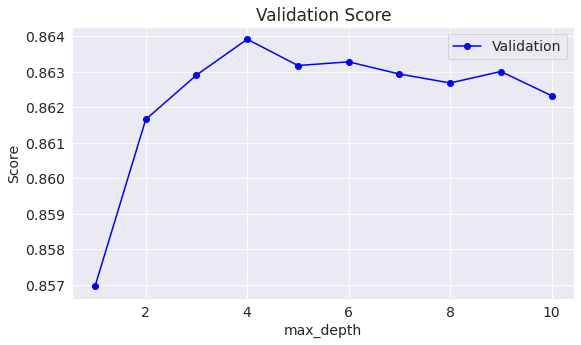

In [300]:
plot_score(test_params_lgbm, 'max_depth', [1,2,3,4,5,6,7,8,9,10])

We see that max_depth = 4 performs the best.

**Tuning the number of iterations**

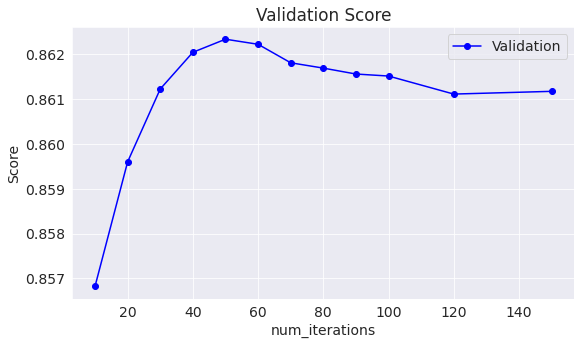

In [317]:
plot_score(test_params_lgbm, 'num_iterations', [10,20,30,40,50,60,70,80,90,100,120,150])

We see that the num_terations peaks at **50**.

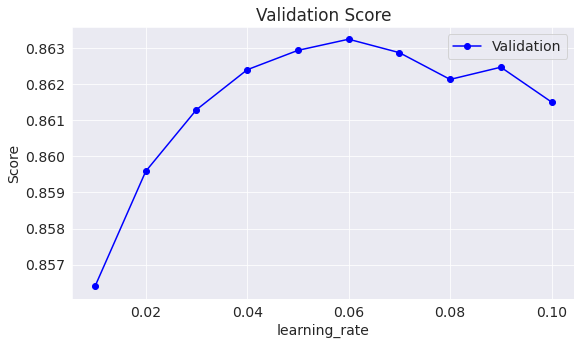

In [318]:
plot_score(test_params_lgbm, 'learning_rate', [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])

We see that learning rate peaks at around **0.06**.

**Tuning the model**

In [319]:
test_params_lgbm(max_depth=4, learning_rate=0.06, num_iterations=50)

(0.8645240497606985, 0.8595049220054143)

After tuning these we get the best scores as follows.

In [335]:
test_params_lgbm(max_depth=4, learning_rate=0.095, num_iterations=110)

(0.8737553050006581, 0.8641656158785245)

### Saving the best model

In [336]:
lgbm = LGBMClassifier(random_state=42, max_depth=4, learning_rate=0.095, num_iterations=110)
lgbm.fit(X_train, y_train)

pickle.dump(lgbm, open('lgbm_model.sav', 'wb'))

## Testing the best model

In [337]:
def model_test(model):
    
    # Getting the features and predicting
    test = pd.get_dummies(testset.iloc[:,2:])
    predict = model.predict_proba(test)[:,1]

    output = pd.DataFrame({'Id': testset.index+1, 'Probability': predict})
    output.to_csv(f'submission.csv',index=False)
    print("Your submission was successfully saved!")
    

In [338]:
# Boost model
model_test(lgbm)

Your submission was successfully saved!


## Feature Importance

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

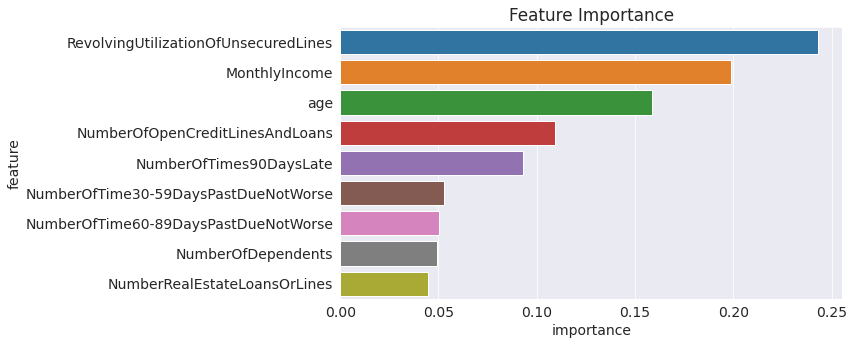

In [339]:
importance_df = pd.DataFrame(
    {'feature': X_train.columns,'importance': forest.feature_importances_}
    ).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

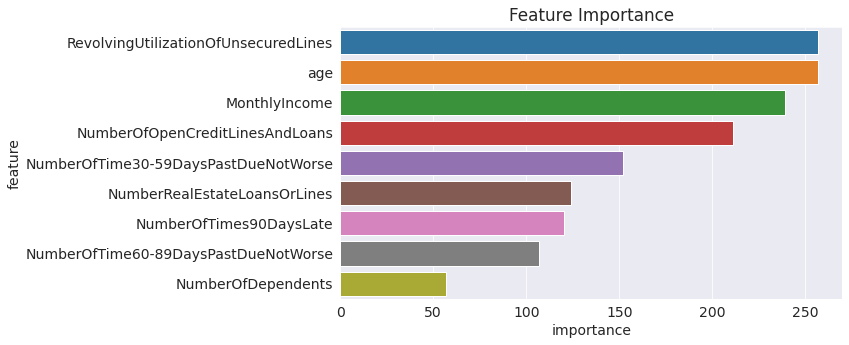

In [340]:
importance_df = pd.DataFrame(
    {'feature': X_train.columns,'importance': lgbm.feature_importances_}
    ).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## Inferences and Conclusion

Upon looking into the data we realized the following :  
1. **The Light Gradient boosting model performs better than the Random Forest model with a validation score of 0.9395**  

2. **The feature importance graph shows that the order of importance is almost same in both model, indicating that both models have learned in a similar way.**
 


## References

https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/decision-trees-and-hyperparameters  
https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization  
https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost  